In [12]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import os
# import matplotlib.dates as mdates
import numpy as np

# open file /run/secrets/postgres_pwd
with open(os.getenv("POSTGRES_PASSWORD_FILE"), 'r') as file:
    password = file.read().strip()

# Connect to your postgres DB
conn = psycopg2.connect(
    host="postgres",      # or IP address
    port=5432,             # default postgres port
    database=os.getenv("POSTGRES_DB"),
    user=os.getenv("POSTGRES_USER"),
    password="mysecretpassword"
)

In [13]:
# made a bart chart with the number of orders according to the frequency
# จำนวน purchase ของแต่ละ user_id

sql = """SELECT COUNT(event_type) AS purchases
FROM customers
WHERE event_type='purchase'
GROUP BY user_id
ORDER BY purchases DESC;"""

df = pd.read_sql_query(sql, conn)

/tmp/ipykernel_54717/621672566.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


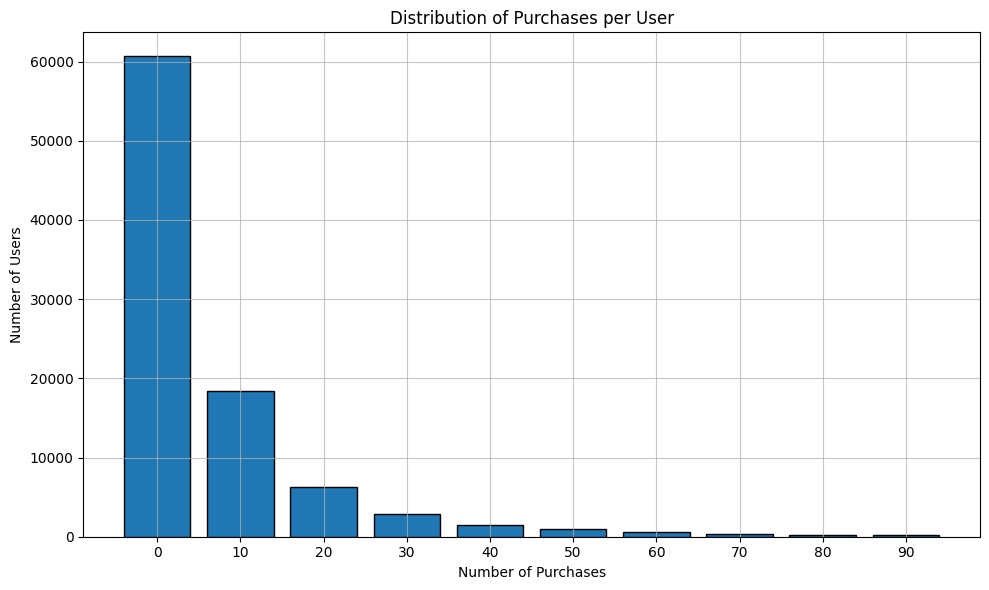

In [15]:
# Create histogram bins
counts, bins = np.histogram(df['purchases'], bins=range(0, 101, 10))

# Convert bin edges to bar centers
# bin_labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]
bin_labels = [f"{bins[i]}" for i in range(len(bins)-1)]

plt.figure(figsize=(10, 6))
plt.bar(bin_labels, counts, edgecolor='black')
plt.title('Distribution of Purchases per User')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
# plt.xticks(rotation=45)
plt.grid(axis='both', alpha=0.75)
plt.tight_layout()
plt.savefig('purchases_distribution.png')
plt.show()

In [16]:
# made a bart chart the Altairian Dollars spent on the site by customers
sql = """SELECT user_id, SUM(price) AS price
FROM customers
WHERE event_type='purchase'
GROUP BY user_id
ORDER BY price DESC;"""
df = pd.read_sql_query(sql, conn)

/tmp/ipykernel_54717/1586754107.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


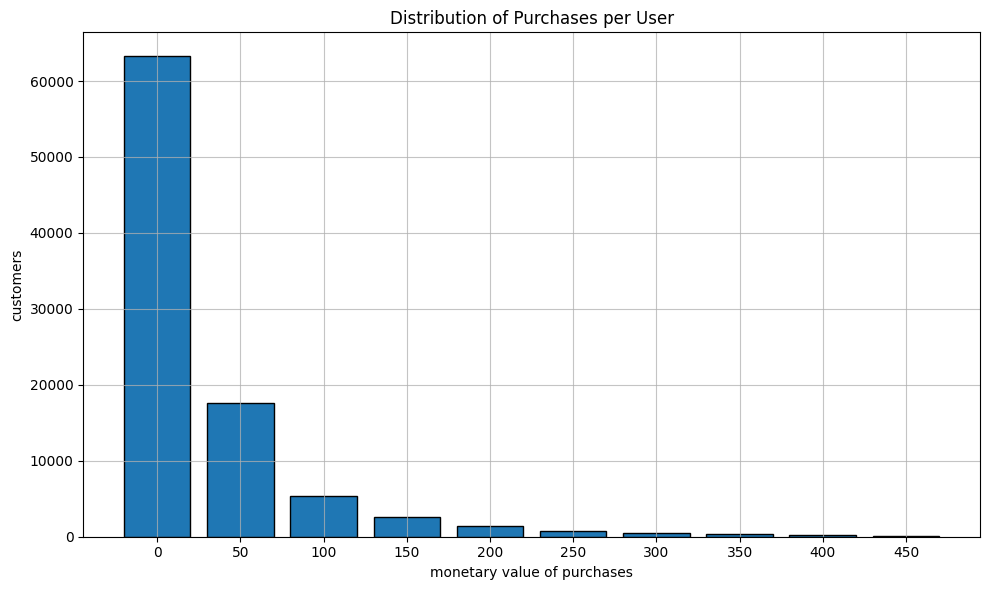

In [17]:
# Create histogram bins
counts, bins = np.histogram(df['price'], bins=range(0, 501, 50))

# Convert bin edges to bar centers
# bin_labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]
bin_labels = [f"{bins[i]}" for i in range(len(bins)-1)]

plt.figure(figsize=(10, 6))
plt.bar(bin_labels, counts, edgecolor='black')
plt.title('Distribution of Purchases per User')
plt.xlabel('monetary value of purchases')
plt.ylabel('customers')
# plt.xticks(rotation=45)
plt.grid(axis='both', alpha=0.75)
plt.tight_layout()
plt.savefig('purchases_distribution.png')
plt.show()

In [9]:
conn.close()
# Close the connection